In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/International_Education_Costs.csv")

In [4]:
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [5]:
df2 = df.drop(["Country",	"City",	"University",	"Program",	"Level"], axis=1)

In [6]:
df2.head()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,2.0,55400,83.5,2200,160,1500,1.00
1,1.0,41200,75.8,1800,485,800,0.79
2,2.0,38500,72.5,1600,235,900,1.35
3,2.0,42000,71.2,1400,450,650,1.52
4,2.0,500,70.5,1100,75,550,0.92


In [7]:
df2.isna().sum()

Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

In [9]:
df2.corr()['Tuition_USD']

Duration_Years       0.140232
Tuition_USD          1.000000
Living_Cost_Index    0.396830
Rent_USD             0.724445
Visa_Fee_USD         0.522490
Insurance_USD        0.582407
Exchange_Rate       -0.116710
Name: Tuition_USD, dtype: float64

In [36]:
mas = list(df2.columns)

In [37]:
mas

['Duration_Years',
 'Tuition_USD',
 'Living_Cost_Index',
 'Rent_USD',
 'Visa_Fee_USD',
 'Insurance_USD',
 'Exchange_Rate']

In [12]:
import matplotlib.pyplot as plt

In [38]:
mas.remove('Tuition_USD')

In [43]:
df2.corr()['Tuition_USD']

Duration_Years       0.140232
Tuition_USD          1.000000
Living_Cost_Index    0.396830
Rent_USD             0.724445
Visa_Fee_USD         0.522490
Insurance_USD        0.582407
Exchange_Rate       -0.116710
Name: Tuition_USD, dtype: float64

In [45]:
roma_age = 45

text = 'Возраст Романа это' + str(roma_age) + 'лет'
text2 = f'Возраст Романа это {roma_age} лет'


In [46]:
text2

'Возраст Романа это 45 лет'

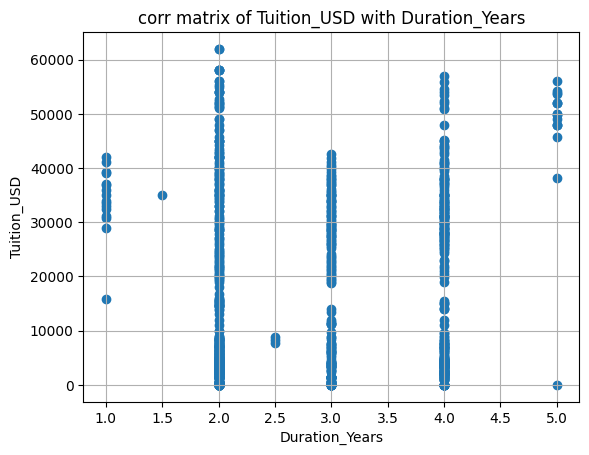

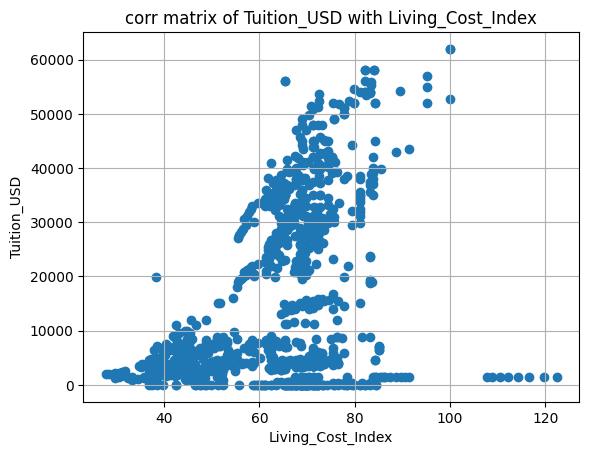

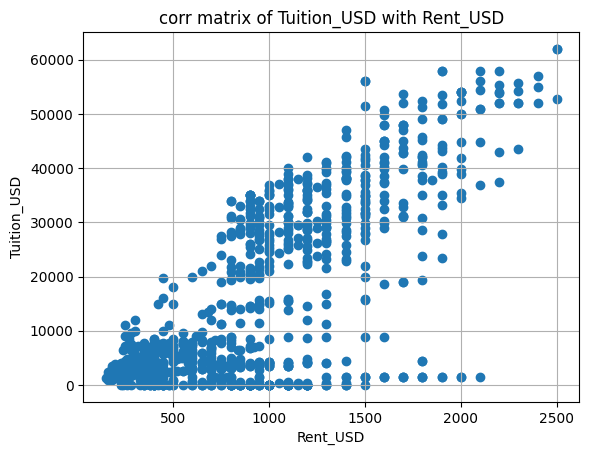

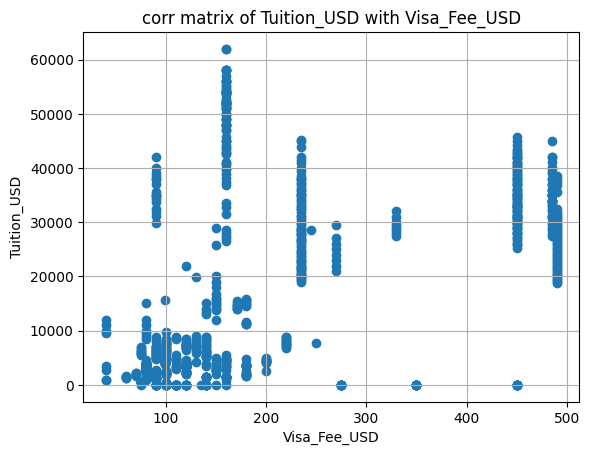

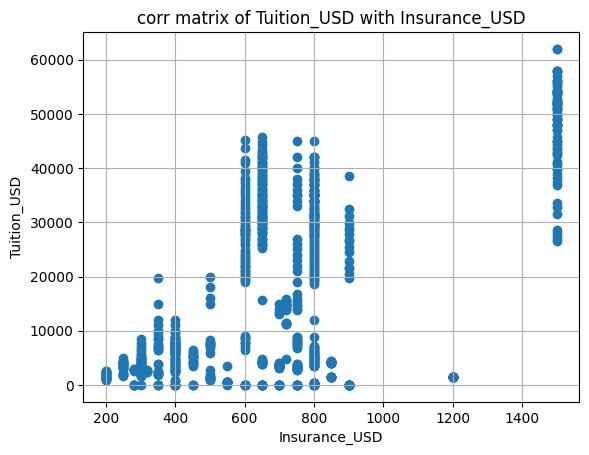

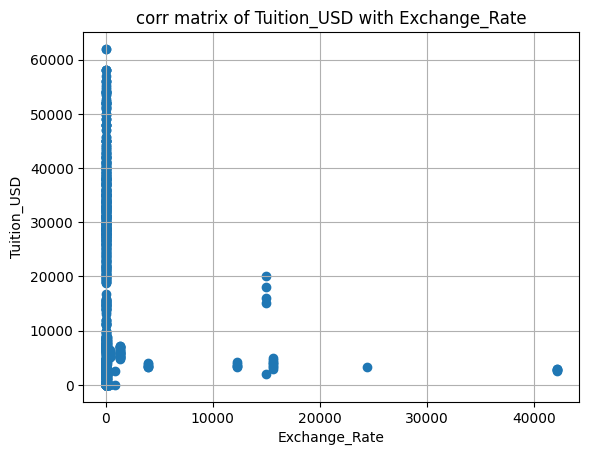

In [47]:
for col in mas:
    plt.scatter(x=df[col], y=df['Tuition_USD'])
    plt.title(f'corr matrix of Tuition_USD with {col}')
    plt.xlabel(col)
    plt.ylabel('Tuition_USD')
    plt.grid()
    plt.show()

In [48]:
from scipy import stats

In [49]:
df2.head()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,2.0,55400,83.5,2200,160,1500,1.00
1,1.0,41200,75.8,1800,485,800,0.79
2,2.0,38500,72.5,1600,235,900,1.35
3,2.0,42000,71.2,1400,450,650,1.52
4,2.0,500,70.5,1100,75,550,0.92


In [50]:
k, b, r, p_value, std_err = stats.linregress(df2['Rent_USD'], df2['Tuition_USD'])

In [51]:
print(k, b, sep='\n')

23.22907567181409
-5808.74702405911


In [52]:
df2['pred_Tuition_USD'] = k * df2['Rent_USD'] + b

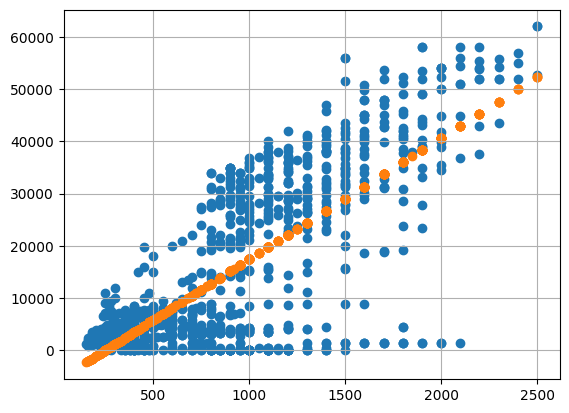

In [55]:
plt.scatter(x=df2['Rent_USD'], y=df2['Tuition_USD'])
plt.scatter(x=df2['Rent_USD'], y=df2['pred_Tuition_USD'])
plt.grid()
plt.show()

In [ ]:
df2.head()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,pred_Tuition_USD
0,2.0,55400,83.5,2200,160,1500,1.00,45295.219454
1,1.0,41200,75.8,1800,485,800,0.79,36003.589185
2,2.0,38500,72.5,1600,235,900,1.35,31357.774051
3,2.0,42000,71.2,1400,450,650,1.52,26711.958916
4,2.0,500,70.5,1100,75,550,0.92,19743.236215


In [57]:
df2['abs_delta'] = abs(df2['Tuition_USD'] - df2['pred_Tuition_USD'])

In [58]:
df2.head()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate,pred_Tuition_USD,abs_delta
0,2.0,55400,83.5,2200,160,1500,1.00,45295.219454,10104.780546
1,1.0,41200,75.8,1800,485,800,0.79,36003.589185,5196.410815
2,2.0,38500,72.5,1600,235,900,1.35,31357.774051,7142.225949
3,2.0,42000,71.2,1400,450,650,1.52,26711.958916,15288.041084
4,2.0,500,70.5,1100,75,550,0.92,19743.236215,19243.236215


In [59]:
df2['abs_delta'].mean()

np.float64(8864.759468736514)

In [60]:
df2['Tuition_USD'].mean()

np.float64(16705.016538037486)